In [19]:
library(ggpubr)
library(tidyverse)

In [20]:
df_meta <- read_csv('../input/GSE120575_meta.csv')
df_tigit <- read_csv('../input/GSE120575_antiTIGIT.csv')
df_lilrb <- read_csv('../input/GSE120575_antiLILRB.csv')
df_tsne <- read_csv("../input/230210_GSE120575_tsne.csv")
# df <- bind_cols(df_meta, df_tigit)

New names:
• `` -> `...1`
Rows: 16291 Columns: 7
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ...1, Sample.name, source.name, organism, characteristics..patinet....

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 16291 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ...1
dbl (4): TIGIT, PVR, CD226, PVRL2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 16291 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1)

In [21]:
df_cluster <- read_tsv('../input/GSE120575_cluster_meta.tsv')
df_meta <- df_meta %>% bind_cols(., df_cluster) %>% select(.,-"Cell Name")
colnames(df_meta)[8] <- "cluster_number"
df_meta <- df_meta %>% mutate(., cluster = with(., case_when(
    (cluster_number == 1) ~ "B cells",
    (cluster_number == 2) ~ "Plasma cells",
    (cluster_number == 3) ~ "Monocytes/Marcropharge",
    (cluster_number == 4) ~ "Dendrictic cells",
    (cluster_number == 5) ~ "Lymphocytes",
    (cluster_number == 6) ~ "Exhausted CD8 T cells",
    (cluster_number == 7) ~ "Regulatory T cells",
    (cluster_number == 8) ~ "Cytotoxicity lymphocytes",
    (cluster_number == 9) ~ "Exhausted/HS CD8 T cells",
    (cluster_number == 10) ~ "Memory T cells",
    (cluster_number == 11) ~ "Lymphocytes exhausted/Cell cycle",
    is.na(cluster_number) ~ 'Unknown',
    TRUE ~ 'Unkown',
    )))

Rows: 16291 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Cell Name
dbl (1): Cluster number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [22]:
head(df_meta,5)

...1,Sample.name,source.name,organism,characteristics..patinet.ID..Pre.baseline..Post..on.treatment.,characteristics..response,characteristics..therapy,cluster_number,cluster
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
A10_P3_M11,Sample 1,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4,5,Lymphocytes
A11_P1_M11,Sample 2,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4,5,Lymphocytes
A11_P3_M11,Sample 3,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4,5,Lymphocytes
A11_P4_M11,Sample 4,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4,7,Regulatory T cells
A12_P3_M11,Sample 5,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4,5,Lymphocytes


In [23]:
df_meta <- df_meta %>% separate(5, c('sampling','patientID'), sep='_')

Warning message:
“Expected 2 pieces. Additional pieces discarded in 1781 rows [521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531,
532, 533, 534, 535, 536, 537, 538, 539, 540, ...].”


뒤에 날라가는 enrichment는 뭔제 모르겠다. 그냥 진행하자

In [24]:
tail(df_meta,5)

...1,Sample.name,source.name,organism,sampling,patientID,characteristics..response,characteristics..therapy,cluster_number,cluster
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
H5_P5_M67_L001_T_enriched,Sample 16287,Melanoma single cell,Homo sapiens,Post,P6,Non-responder,anti-PD1,11,Lymphocytes exhausted/Cell cycle
H6_P5_M67_L001_T_enriched,Sample 16288,Melanoma single cell,Homo sapiens,Post,P6,Non-responder,anti-PD1,11,Lymphocytes exhausted/Cell cycle
H7_P5_M67_L001_T_enriched,Sample 16289,Melanoma single cell,Homo sapiens,Post,P6,Non-responder,anti-PD1,11,Lymphocytes exhausted/Cell cycle
H8_P5_M67_L001_T_enriched,Sample 16290,Melanoma single cell,Homo sapiens,Post,P6,Non-responder,anti-PD1,9,Exhausted/HS CD8 T cells
H9_P5_M67_L001_T_enriched,Sample 16291,Melanoma single cell,Homo sapiens,Post,P6,Non-responder,anti-PD1,5,Lymphocytes


In [25]:
df <- df_meta %>% left_join(., df_tsne) %>% left_join(., df_tigit)  %>% left_join(., df_lilrb) 
colnames(df)[1] <- 'cellID'
colnames(df)[7] <- 'response'
colnames(df)[8] <- 'therapy'
head(df,5)

Joining, by = "...1"
Joining, by = "...1"
Joining, by = "...1"


cellID,Sample.name,source.name,organism,sampling,patientID,response,therapy,cluster_number,cluster,tSNE_1,tSNE_2,TIGIT,PVR,CD226,PVRL2,LILRB1,LILRB2,LILRB4,HLA-G
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A10_P3_M11,Sample 1,Melanoma single cell,Homo sapiens,Pre,P1,Responder,anti-CTLA4,5,Lymphocytes,33.46514,47.405188,0.00,0,0.00,0,0,0,0,3.63
A11_P1_M11,Sample 2,Melanoma single cell,Homo sapiens,Pre,P1,Responder,anti-CTLA4,5,Lymphocytes,39.46433,34.494580,0.00,0,0.00,0,0,0,0,4.10
A11_P3_M11,Sample 3,Melanoma single cell,Homo sapiens,Pre,P1,Responder,anti-CTLA4,5,Lymphocytes,15.64004,68.354306,0.00,0,0.00,0,0,0,0,3.89
A11_P4_M11,Sample 4,Melanoma single cell,Homo sapiens,Pre,P1,Responder,anti-CTLA4,7,Regulatory T cells,-45.06960,-9.706009,10.35,0,8.16,0,0,0,0,4.36
A12_P3_M11,Sample 5,Melanoma single cell,Homo sapiens,Pre,P1,Responder,anti-CTLA4,5,Lymphocytes,59.62606,15.776657,0.00,0,0.00,0,0,0,0,3.18


In [26]:
write_csv(df, "../output/230213_GSE120575.csv")

# 시각화

In [27]:
df <- read_csv("../output/230213_GSE120575.csv")
tail(df,5)

Rows: 16291 Columns: 20
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): cellID, Sample.name, source.name, organism, sampling, patientID, r...
dbl (11): cluster_number, tSNE_1, tSNE_2, TIGIT, PVR, CD226, PVRL2, LILRB1, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cellID,Sample.name,source.name,organism,sampling,patientID,response,therapy,cluster_number,cluster,tSNE_1,tSNE_2,TIGIT,PVR,CD226,PVRL2,LILRB1,LILRB2,LILRB4,HLA-G
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
H5_P5_M67_L001_T_enriched,Sample 16287,Melanoma single cell,Homo sapiens,Post,P6,Non-responder,anti-PD1,11,Lymphocytes exhausted/Cell cycle,-63.20608,11.091901,7.34,6.02,0.00,0,0,0,0,3.58
H6_P5_M67_L001_T_enriched,Sample 16288,Melanoma single cell,Homo sapiens,Post,P6,Non-responder,anti-PD1,11,Lymphocytes exhausted/Cell cycle,-65.10204,5.313462,0.00,0.00,5.78,0,0,0,0,3.72
H7_P5_M67_L001_T_enriched,Sample 16289,Melanoma single cell,Homo sapiens,Post,P6,Non-responder,anti-PD1,11,Lymphocytes exhausted/Cell cycle,-49.31852,21.872107,0.00,0.00,0.00,0,0,0,0,4.98
H8_P5_M67_L001_T_enriched,Sample 16290,Melanoma single cell,Homo sapiens,Post,P6,Non-responder,anti-PD1,9,Exhausted/HS CD8 T cells,67.46651,-4.959189,0.00,0.00,0.00,0,0,0,0,0.00
H9_P5_M67_L001_T_enriched,Sample 16291,Melanoma single cell,Homo sapiens,Post,P6,Non-responder,anti-PD1,5,Lymphocytes,66.84902,-1.391138,0.00,0.00,0.00,0,0,0,0,0.00


In [28]:
colnames(df)

[1] "cellID"         "Sample.name"    "source.name"    "organism"      
 [5] "sampling"       "patientID"      "response"       "therapy"       
 [9] "cluster_number" "cluster"        "tSNE_1"         "tSNE_2"        
[13] "TIGIT"          "PVR"            "CD226"          "PVRL2"         
[17] "LILRB1"         "LILRB2"         "LILRB4"         "HLA-G"

In [29]:
dim(df)

[1] 16291    20

# tSNE plot 그리기

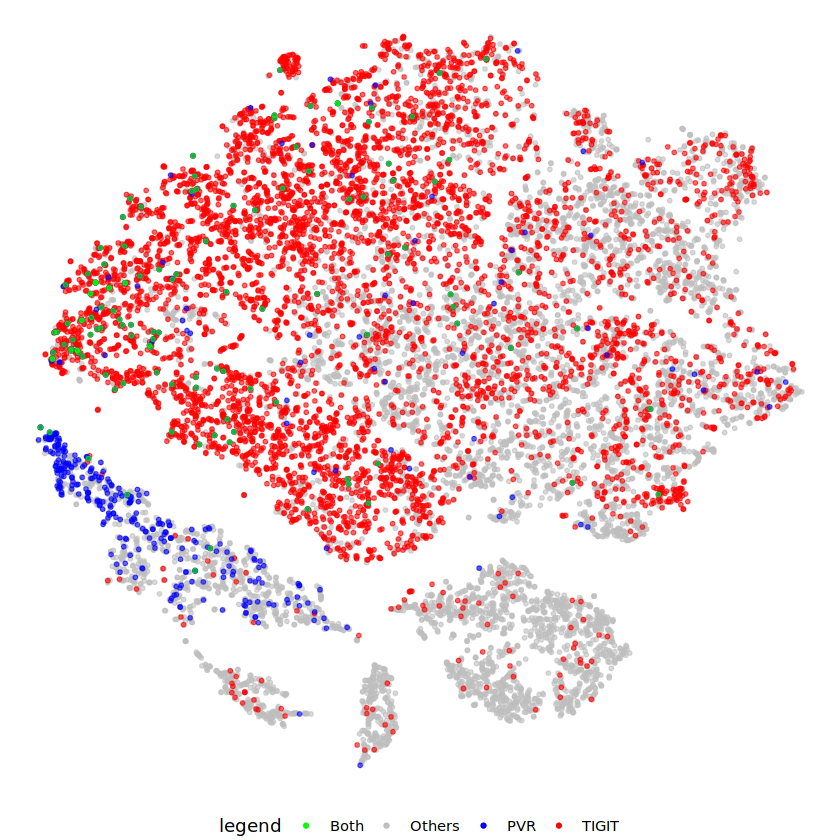

In [30]:
library(ggplot2)
#Code
# No data for centers so can not add that to the plot. You are right in the fact that the continuous variable is messing the plot. Instead set it as factor() and use scale_color_manual() to change the colors. Here the code:

data_other <- df %>% filter(TIGIT==0, PVR==0) 
data_1 <- df %>% filter(TIGIT>0)
data_2 <- df %>% filter(PVR>0)
data_3 <- df %>% filter(TIGIT>0 & PVR>0)

cols <- c("Others"="grey","TIGIT"="red","PVR"="blue", "Both"="green")

ggplot() + 
  geom_point(data_other, mapping=aes(x=tSNE_1, y=tSNE_2, color = 'Others',), size=1, alpha = 0.6) +
  geom_point(data_1, mapping=aes(x=tSNE_1, y=tSNE_2, color = 'TIGIT'), size=1, alpha = 0.6) +
  geom_point(data_2, mapping=aes(x=tSNE_1, y=tSNE_2, color = 'PVR'), size=1, alpha = 0.6) +
  geom_point(data_3, mapping=aes(x=tSNE_1, y=tSNE_2, color = 'Both'), size=1, alpha = 0.6) +
  ylab("") + xlab("") + theme_void() +
  scale_color_manual(name="legend", values=cols) + theme(legend.position = "bottom")

In [31]:
data_1%>% group_by(cluster) %>% summarise(n = n())

cluster,n
<chr>,<int>
B cells,54
Cytotoxicity lymphocytes,550
Dendrictic cells,16
Exhausted CD8 T cells,1392
Exhausted/HS CD8 T cells,883
Lymphocytes,481
Lymphocytes exhausted/Cell cycle,750
Memory T cells,360
Monocytes/Marcropharge,26


In [32]:
data_2 %>% group_by(cluster) %>% summarise(n = n())

cluster,n
<chr>,<int>
B cells,2
Cytotoxicity lymphocytes,22
Dendrictic cells,1
Exhausted CD8 T cells,19
Exhausted/HS CD8 T cells,25
Lymphocytes,9
Lymphocytes exhausted/Cell cycle,74
Memory T cells,8
Monocytes/Marcropharge,277


In [33]:
data_3 %>% group_by(cluster) %>% summarise(n = n())

cluster,n
<chr>,<int>
Cytotoxicity lymphocytes,6
Exhausted CD8 T cells,15
Exhausted/HS CD8 T cells,19
Lymphocytes,2
Lymphocytes exhausted/Cell cycle,56
Memory T cells,1
Monocytes/Marcropharge,5
Regulatory T cells,18


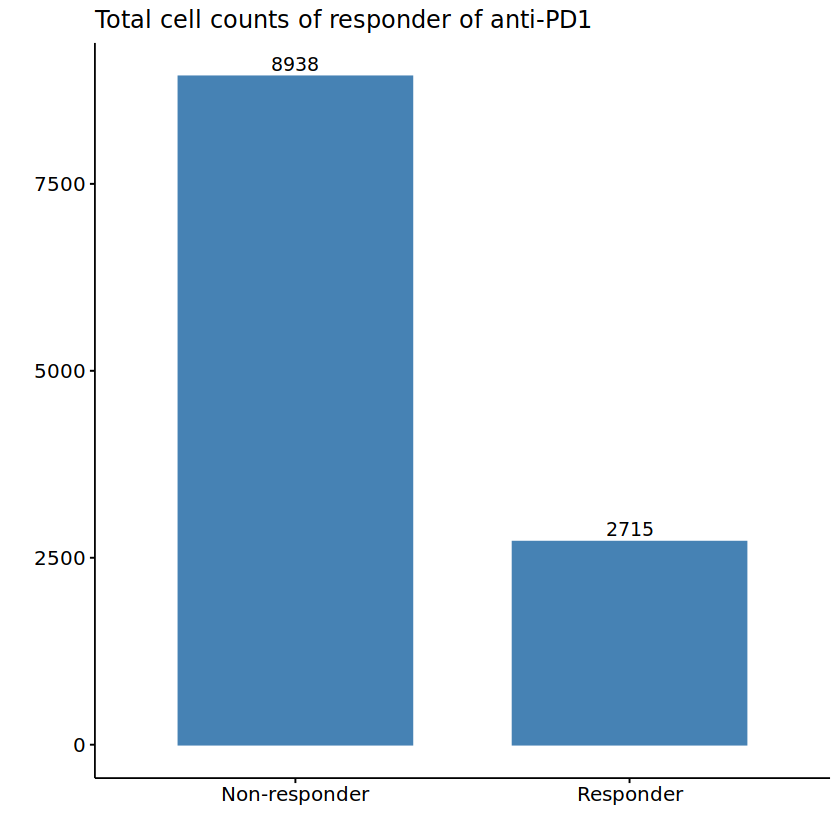

In [34]:
data <- df %>% filter(therapy == "anti-PD1") %>% group_by(response) %>% summarise(n = n())

ggbarplot(
    data, x = "response", y = "n",
    fill = "steelblue", color = "steelblue",
    label = TRUE) + 
      ggtitle("Total cell counts of responder of anti-PD1") + ylab("") + xlab("")

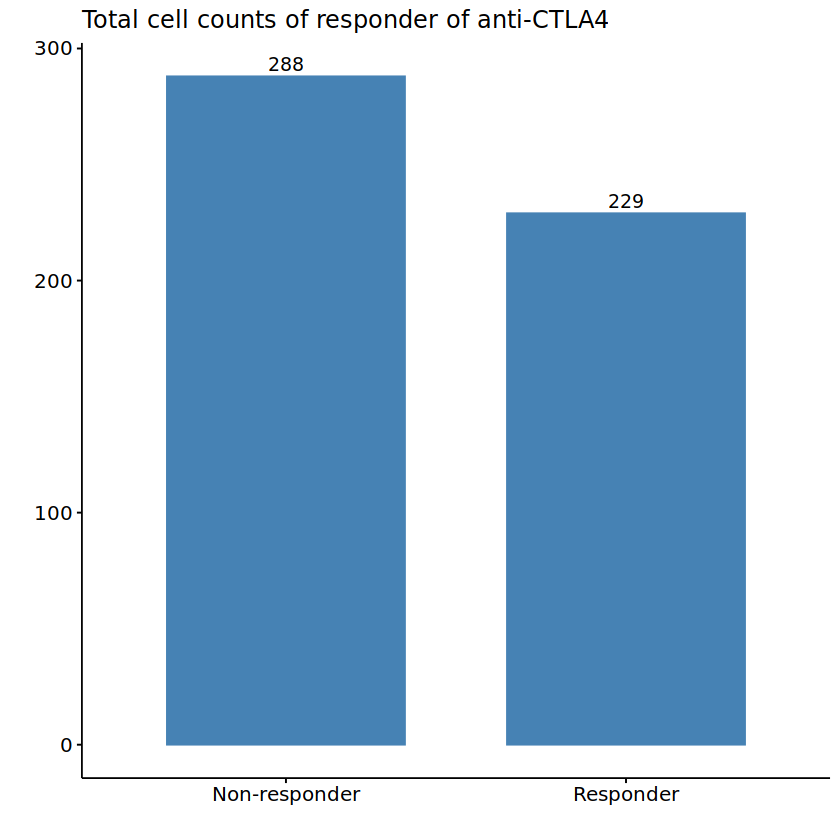

In [35]:
data <- df %>% filter(therapy == "anti-CTLA4") %>% group_by(response) %>% summarise(n = n())

ggbarplot(
    data, x = "response", y = "n",
    fill = "steelblue", color = "steelblue",
    label = TRUE) + 
      ggtitle("Total cell counts of responder of anti-CTLA4") + ylab("") + xlab("")

Warning message:
“Removed 2786 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2786 rows containing missing values (`geom_point()`).”


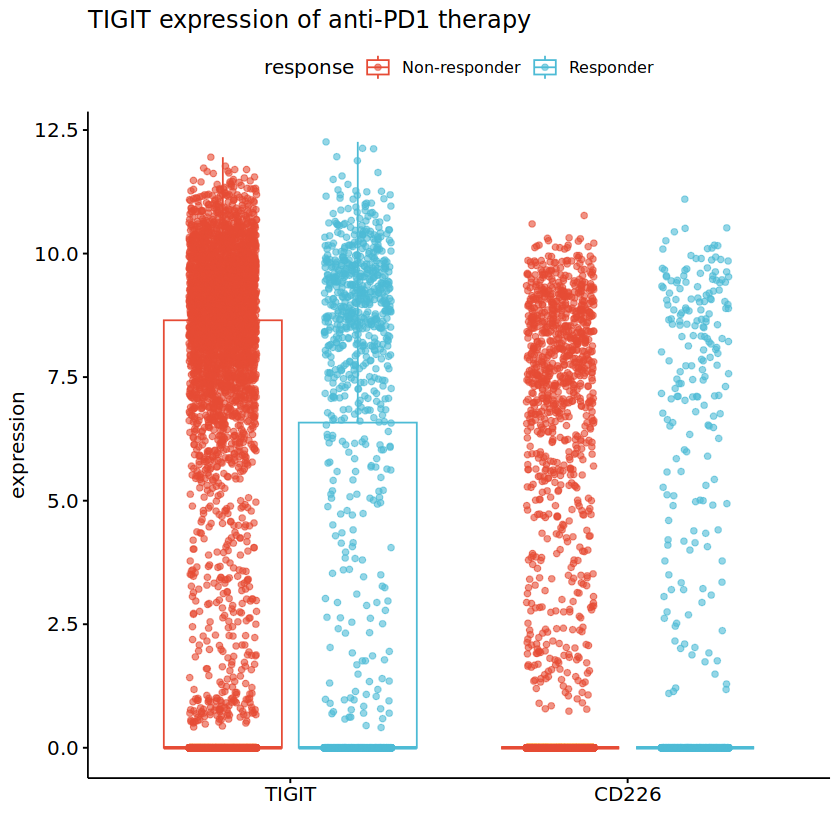

In [56]:
data <- df %>% select('sampling','patientID','response','therapy', 'cluster','TIGIT','CD226') %>% filter(therapy == 'anti-PD1') %>% pivot_longer(.,cols=6:7, names_to='gene', values_to="exp")

ggboxplot(
    data=data,
    x="gene", y="exp", color = "response", 
    xlab="",ylab="expression",title="TIGIT expression of anti-PD1 therapy",
    add = "jitter", add.params=list(alpha=0.6),
    palette = "npg",
)

Warning message:
“Removed 1393 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1393 rows containing missing values (`geom_point()`).”


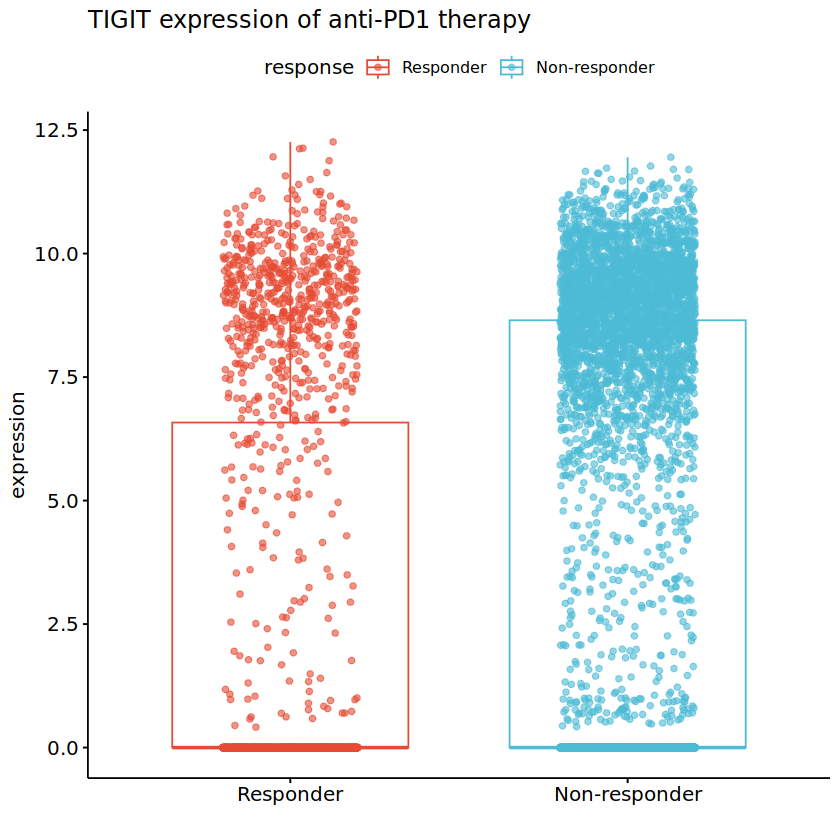

In [57]:
data <- df %>% select('sampling','patientID','response','therapy', 'cluster','TIGIT','CD226') %>% filter(therapy == 'anti-PD1')

ggboxplot(
    data=data,
    x="response", y="TIGIT", color = "response", 
    xlab="",ylab="expression",title="TIGIT expression of anti-PD1 therapy",
    add = "jitter", add.params=list(alpha=0.6),
    palette = "npg",
)

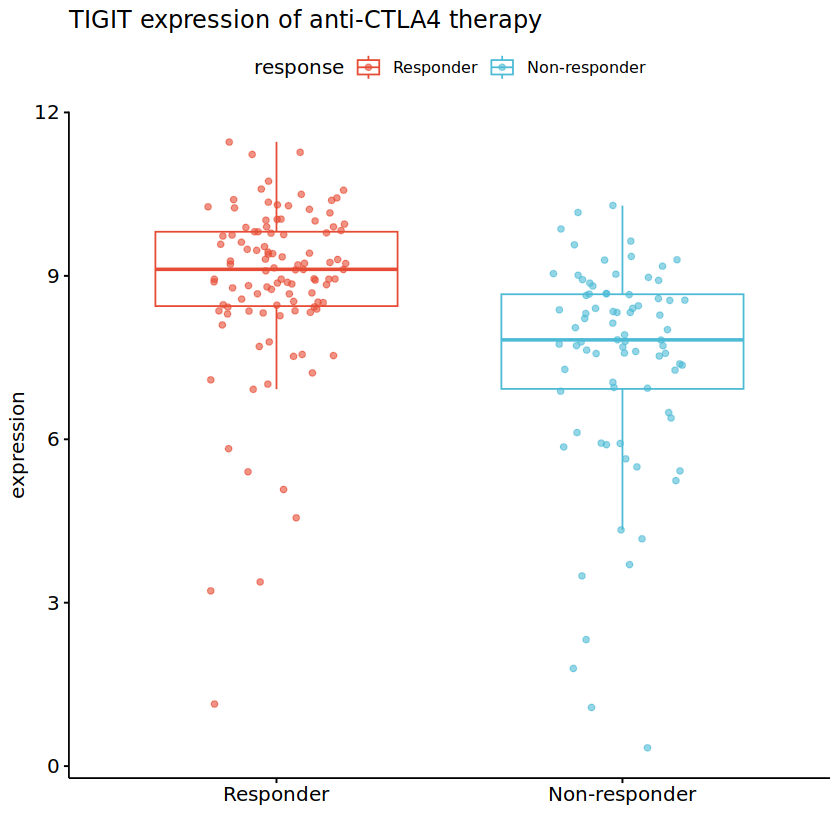

In [48]:
data <- df %>% filter(therapy == 'anti-CTLA4', TIGIT>0)

ggboxplot(
    data=data,
    x="response", y="TIGIT", color = "response", 
    xlab="",ylab="expression",title="TIGIT expression of anti-CTLA4 therapy",
    add = "jitter", add.params=list(alpha=0.6),
    palette = "npg",
)

# subset별 차이

In [38]:
# data <- df %>% filter(therapy == "anti-PD1", response=="Non-responder", TIGIT > 0)

# ggboxplot(
#     data=data,
#     x="cluster", y="TIGIT", color = "cluster", 
#     xlab="",ylab="expression",title="TIGIT expression of anti-PD1 therapy",
#     add = "jitter", add.params=list(alpha=0.6),
#     palette = "npg",
# )+ rotate_x_text(70)

Warning message:
“Removed 1393 rows containing non-finite values (`stat_boxplot()`).”


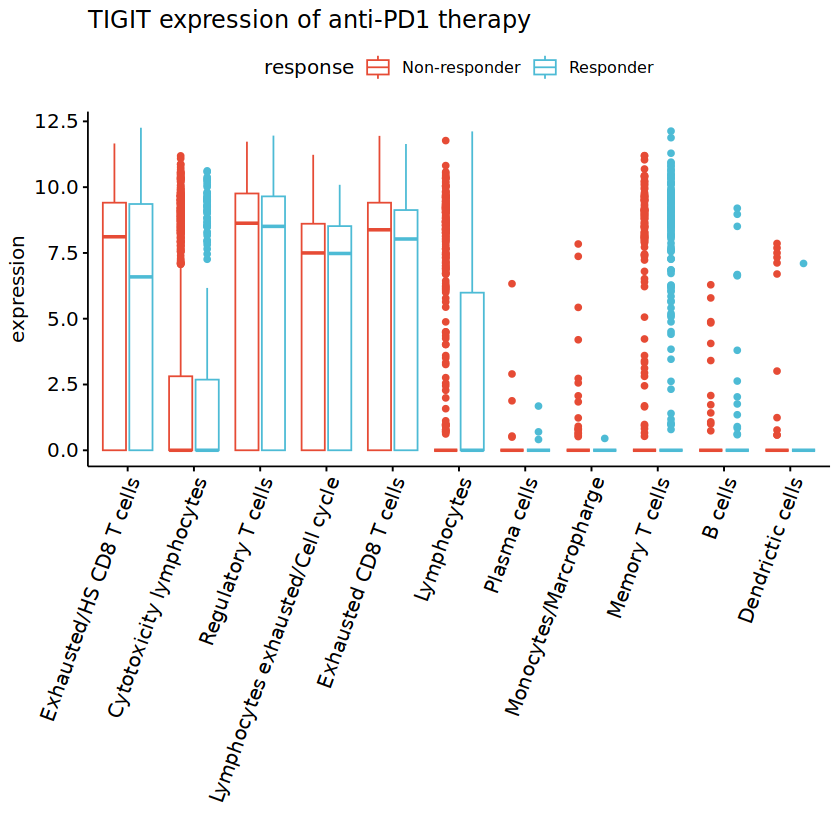

In [60]:
data <- df %>% filter(therapy == "anti-PD1")

ggboxplot(
    data=data,
    x="cluster", y="TIGIT", color = "response", 
    xlab="",ylab="expression",title="TIGIT expression of anti-PD1 therapy",
    # add = "jitter", add.params=list(alpha=0.6),
    palette = "npg",
)+ rotate_x_text(70)

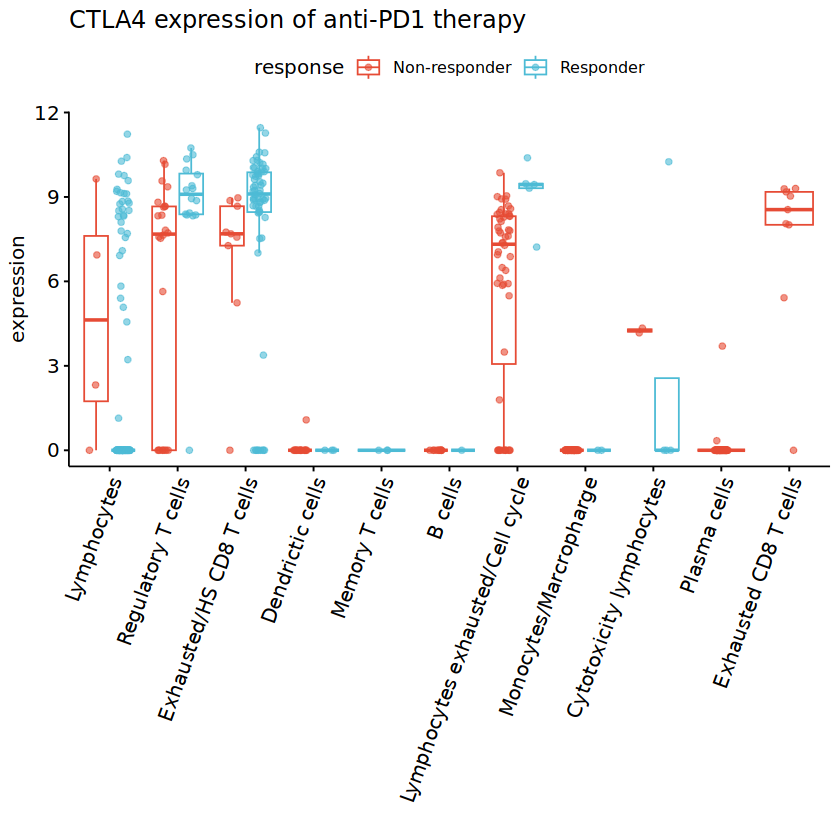

In [61]:
data <- df %>% filter(therapy == "anti-CTLA4")

ggboxplot(
    data=data,
    x="cluster", y="TIGIT", color = "response", 
    xlab="",ylab="expression",title="CTLA4 expression of anti-PD1 therapy",
    add = "jitter", add.params=list(alpha=0.6),
    palette = "npg",
)+ rotate_x_text(70)

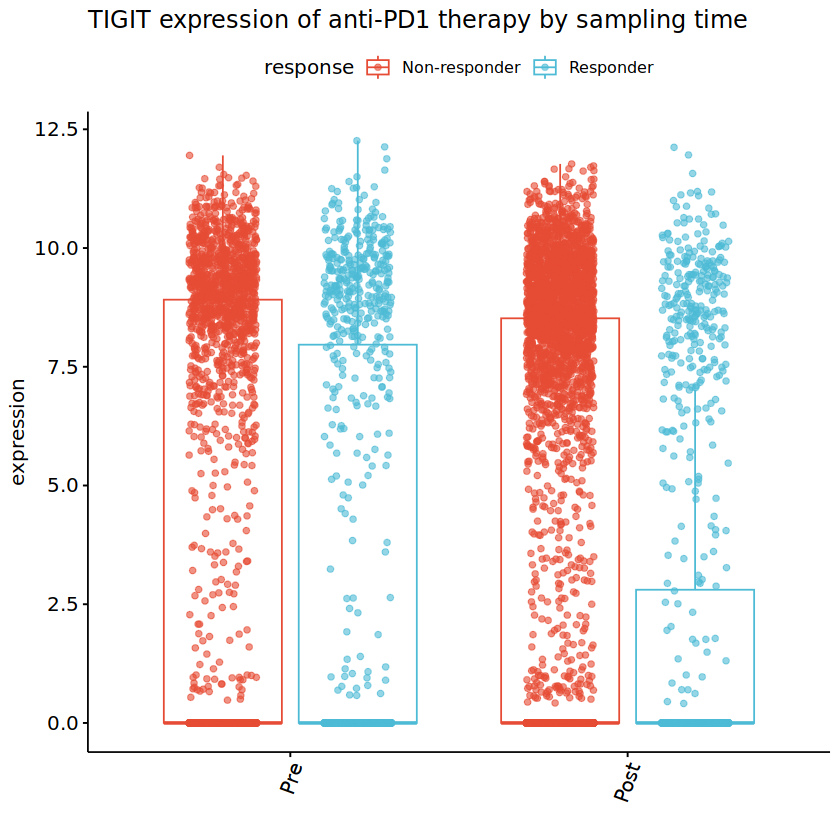

In [67]:
data <- df %>% filter(therapy == "anti-PD1") %>% drop_na()
positions <- c("Pre", "Post")
ggboxplot(
    data=data,
    x="sampling", y="TIGIT", color = "response", 
    xlab="",ylab="expression",title="TIGIT expression of anti-PD1 therapy by sampling time",
    add = "jitter", add.params=list(alpha=0.6),
    palette = "npg",
)+ rotate_x_text(70) + scale_x_discrete(limits=positions)

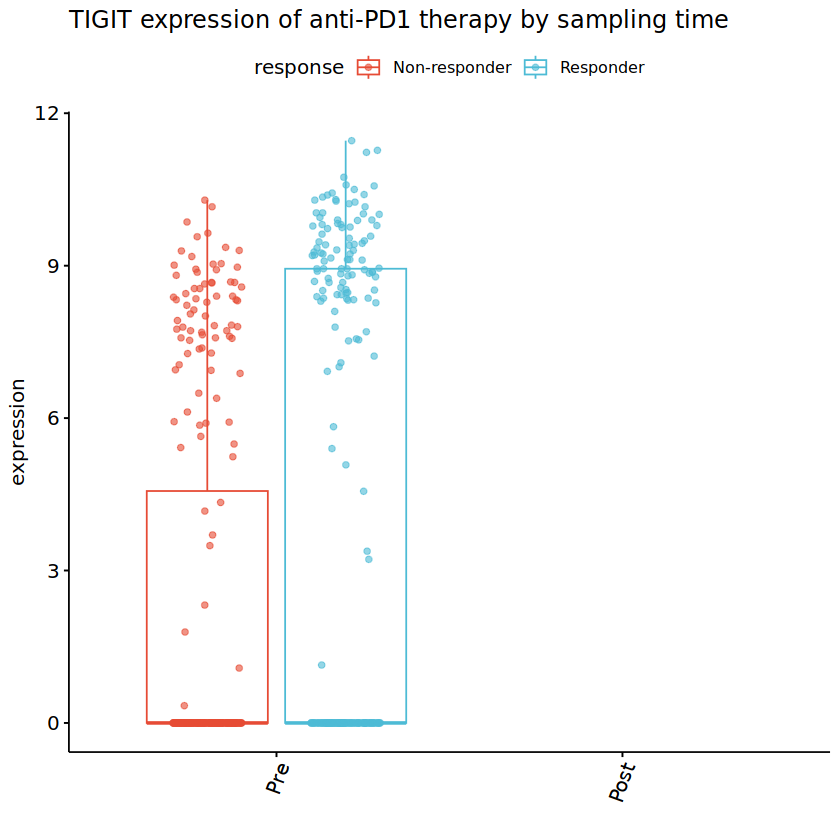

In [68]:
data <- df %>% filter(therapy == "anti-CTLA4") %>% drop_na()
positions <- c("Pre", "Post")
ggboxplot(
    data=data,
    x="sampling", y="TIGIT", color = "response", 
    xlab="",ylab="expression",title="TIGIT expression of anti-PD1 therapy by sampling time",
    add = "jitter", add.params=list(alpha=0.6),
    palette = "npg",
)+ rotate_x_text(70) + scale_x_discrete(limits=positions)

In [71]:
unique(df[['cluster']])

[1] "Lymphocytes"                      "Regulatory T cells"              
 [3] "Exhausted/HS CD8 T cells"         "Dendrictic cells"                
 [5] "Memory T cells"                   "B cells"                         
 [7] "Lymphocytes exhausted/Cell cycle" "Monocytes/Marcropharge"          
 [9] "Cytotoxicity lymphocytes"         "Exhausted CD8 T cells"           
[11] "Plasma cells"